# **NLM Assignment 1**


*   USN-ENG20AM0063

*   Name-Yash Mahesh Narule
*   Section-6H










**All the inport statements**

In [1]:
#taking all the inputs for the code
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [5]:
#reading data from the csv file which has been take from kaggle website
#https://www.kaggle.com/code/sujithmandala/spam-filtering-nlp-logistic-regression-98-acc/input
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [6]:
#checking the data frame
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
#dropping unwanted columns
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [8]:
#checking our data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:

# Concatenate all tweet texts into a single string
all_text = ' '.join(df['v2'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [10]:
#checking our all tweets are mergerd correctly or not
all_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more?

**Tokenization**

In [11]:
#using nltk library and using word_tokenize funtion we tokenize the data collected#yash_narule
nltk.download('punkt')
nltk_tokens = nltk.word_tokenize(all_text)
print (nltk_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 'T', '&', 'C', "'s", 'apply', '08452810075over18', "'s", 'U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...', 'Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though', 'FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv', 'Even'

**Using Regular Expression with Findall function to list meaningful tokens from the source dataset**

In [12]:
regex = '[a-zA-Z]+'                
clean = re.findall(regex,all_text) 
print(clean) 

['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat', 'Ok', 'lar', 'Joking', 'wif', 'u', 'oni', 'Free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', 'st', 'May', 'Text', 'FA', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 's', 'apply', 'over', 's', 'U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say', 'Nah', 'I', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'to', 'rcv', 'Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'They', 'treat', 'me', 'like', 'aids', 'patent', 'As', 'per', 'your', 'request', 'Melle

**Removing Stop Words**

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
tokens_without_sw = [word for word in clean if not word in stopwords.words()]

print(tokens_without_sw)

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'great', 'world', 'buffet', 'Cine', 'amore', 'Ok', 'lar', 'Joking', 'wif', 'Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', 'st', 'May', 'Text', 'FA', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 'apply', 'U', 'dun', 'early', 'U', 'Nah', 'I', 'usf', 'lives', 'FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'fun', 'Tb', 'XxX', 'std', 'chgs', 'send', 'rcv', 'Even', 'brother', 'speak', 'They', 'treat', 'aids', 'patent', 'As', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'set', 'callertune', 'Callers', 'Press', 'copy', 'friends', 'Callertune', 'WINNER', 'As', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'To', 'claim', 'call', 'Claim', 'code', 'KL', 'Valid', 'hours', 'Had', 'mobile', 'months', 'U', 'R', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', 'I',

Some more fine cleaning using the rear expressions

In [15]:
#removing single words like n,g,etc
clean2=[]
r = '[a-zA-Z]'             
for words in tokens_without_sw:
  if words not in (re.findall(r,words)):
    clean2.append(words) 
print(clean2) 

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'great', 'world', 'buffet', 'Cine', 'amore', 'Ok', 'lar', 'Joking', 'wif', 'Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', 'st', 'May', 'Text', 'FA', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', 'dun', 'early', 'Nah', 'usf', 'lives', 'FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'fun', 'Tb', 'XxX', 'std', 'chgs', 'send', 'rcv', 'Even', 'brother', 'speak', 'They', 'treat', 'aids', 'patent', 'As', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'set', 'callertune', 'Callers', 'Press', 'copy', 'friends', 'Callertune', 'WINNER', 'As', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'To', 'claim', 'call', 'Claim', 'code', 'KL', 'Valid', 'hours', 'Had', 'mobile', 'months', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', 'gonna', 'home', 'talk', 'stuff', 'anymore',

**Normalization And Converting it to lower string**

In [16]:
clean3=[]
for words in clean2:
  clean3.append(words.lower())
print(clean3)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'amore', 'ok', 'lar', 'joking', 'wif', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', 'dun', 'early', 'nah', 'usf', 'lives', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'fun', 'tb', 'xxx', 'std', 'chgs', 'send', 'rcv', 'even', 'brother', 'speak', 'they', 'treat', 'aids', 'patent', 'as', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune', 'winner', 'as', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'to', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours', 'had', 'mobile', 'months', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'the', 'mobile', 'update', 'co', 'free', 'gonna', 'home', 'talk', 'stuff', 'anymore',

**Lemmatization of data set**

In [17]:
#importing word package from textblob to lemmatize the words#yash_narule
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')
clean4=[]
clean5=[]
clean6=[]
clean7=[]
clean8=[]

for words in clean3:
  v = Word(words)
  clean4.append(v.lemmatize())
for words in clean4:
  v = Word(words)
  #verb
  clean5.append(v.lemmatize("v"))
for words in clean5:
  v = Word(words)
  #Adjective
  clean6.append(v.lemmatize("a"))
for words in clean6:
  v = Word(words)
  #Noun
  clean7.append(v.lemmatize("n"))
for words in clean7:
  v = Word(words)
  #Abverb
  clean8.append(v.lemmatize("r"))
print(clean8)
 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'amore', 'ok', 'lar', 'joke', 'wif', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', 'dun', 'early', 'nah', 'usf', 'life', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'fun', 'tb', 'xxx', 'std', 'chgs', 'send', 'rcv', 'even', 'brother', 'speak', 'they', 'treat', 'aid', 'patent', 'a', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune', 'winner', 'a', 'value', 'network', 'customer', 'select', 'receivea', 'prize', 'reward', 'to', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour', 'have', 'mobile', 'month', 'entitle', 'update', 'late', 'colour', 'mobile', 'camera', 'free', 'call', 'the', 'mobile', 'update', 'co', 'free', 'gonna', 'home', 'talk', 'stuff', 'anymore', 'tonight', 'cry

**Word Frequency**

In [20]:
# counter to count the txts
from collections import Counter
top_words=[]
word_counts = Counter(clean8)
top_words = word_counts.most_common()
top_words


[('call', 693),
 ('ur', 385),
 ('you', 344),
 ('lt', 316),
 ('day', 291),
 ('free', 288),
 ('time', 253),
 ('love', 245),
 ('be', 241),
 ('text', 222),
 ('send', 220),
 ('it', 216),
 ('no', 215),
 ('do', 189),
 ('txt', 183),
 ('today', 181),
 ('make', 177),
 ('stop', 171),
 ('home', 167),
 ('reply', 164),
 ('how', 163),
 ('ok', 162),
 ('sorry', 160),
 ('mobile', 157),
 ('back', 153),
 ('we', 148),
 ('if', 144),
 ('but', 142),
 ('phone', 142),
 ('week', 141),
 ('so', 135),
 ('work', 135),
 ('pls', 134),
 ('miss', 132),
 ('meet', 131),
 ('what', 129),
 ('msg', 129),
 ('just', 128),
 ('dear', 128),
 ('the', 126),
 ('message', 125),
 ('my', 125),
 ('co', 123),
 ('have', 122),
 ('night', 122),
 ('wait', 121),
 ('give', 119),
 ('your', 118),
 ('great', 117),
 ('win', 117),
 ('claim', 115),
 ('hope', 115),
 ('hey', 112),
 ('and', 112),
 ('number', 110),
 ('happy', 109),
 ('leave', 108),
 ('friend', 107),
 ('late', 106),
 ('tell', 105),
 ('hi', 104),
 ('find', 102),
 ('now', 99),
 ('this', 97)

## Web Scraping 

In [2]:
#import statements
import requests
from bs4 import BeautifulSoup

In [3]:
#yash_narule
import requests
from bs4 import BeautifulSoup
#requesting the requests from the url
page = requests.get('https://www.businessinsider.in/sports/the-20-most-famous-athletes-in-the-world/slidelist/52209638.cms#slideid=52209639')
soup = BeautifulSoup(page.text, 'html.parser')

<!DOCTYPE doctype html>
<html xmlns:ext="http://exslt.org/common" xmlns:g="http://base.google.com/ns/1.0" xmlns:str="http://exslt.org/strings">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   The 20 most famous athletes in the world | BusinessInsider India
  </title>
  <meta content="419305594841863" property="fb:pages"/>
  <meta content="Sunday, 12 March, 2023  08:41:21PM" http-equiv="Last-Modified"/>
  <meta content="Sport: Soccer
Country: Portugal
Salary: $52.2 million
Endorsements:" name="description"/>
  <meta content="" name="keywords"/>
  <link href="https://www.businessinsider.in/sports/the-20-most-famous-athletes-in-the-world/slidelist/52209638.cms" rel="canonical"/>
  <script async="true" defer="true" id="snapkit-creative-kit-sdk" src="https://sdk.snapkit.com/js/v1/create.js">
  </script>
  <link href="https://www.businessinsider.in/sports/the-20-most-famous-athletes-in-the-world/slidelist/52209638.cms" itemprop="mainEntityOfPage"/>
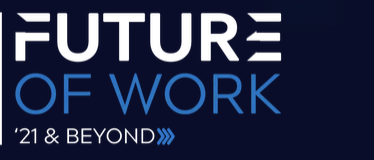

In [24]:
#checking the response what we got
print(soup.prettify())

In [4]:
#finding all the H2 tags
names=[]
artist_name_list_items = str(soup.find_all('h2'))
artist_name_list_items


'[<h2><meta content="No. 1 Cristiano Ronaldo" itemprop="name"/><meta content="1" itemprop="position"/>No. 1 Cristiano Ronaldo</h2>, <h2><meta content="No. 2 LeBron James" itemprop="name"/><meta content="2" itemprop="position"/>No. 2 LeBron James</h2>, <h2><meta content="No. 3 Lionel Messi" itemprop="name"/><meta content="3" itemprop="position"/>No. 3 Lionel Messi</h2>, <h2><meta content="No. 4 Neymar Jr." itemprop="name"/><meta content="4" itemprop="position"/>No. 4 Neymar Jr.</h2>, <h2><meta content="No. 5 Roger Federer" itemprop="name"/><meta content="5" itemprop="position"/>No. 5 Roger Federer</h2>, <h2><meta content="No. 6 Kevin Durant" itemprop="name"/><meta content="6" itemprop="position"/>No. 6 Kevin Durant</h2>, <h2><meta content="No. 7 Tiger Woods" itemprop="name"/><meta content="7" itemprop="position"/>No. 7 Tiger Woods</h2>, <h2><meta content="No. 8 James Rodriguez" itemprop="name"/><meta content="8" itemprop="position"/>No. 8 James Rodriguez</h2>, <h2><meta content="No. 9 R

In [5]:

# Concatenate all tweet texts into a single strin
# Remove URLs, mentions, and hashtags from the text
all_text2 = re.sub(r'"[0-9]+\t[\w+]"', '', artist_name_list_items)
all_text2

'[<h2><meta content="No. 1 Cristiano Ronaldo" itemprop="name"/><meta content="1" itemprop="position"/>No. 1 Cristiano Ronaldo</h2>, <h2><meta content="No. 2 LeBron James" itemprop="name"/><meta content="2" itemprop="position"/>No. 2 LeBron James</h2>, <h2><meta content="No. 3 Lionel Messi" itemprop="name"/><meta content="3" itemprop="position"/>No. 3 Lionel Messi</h2>, <h2><meta content="No. 4 Neymar Jr." itemprop="name"/><meta content="4" itemprop="position"/>No. 4 Neymar Jr.</h2>, <h2><meta content="No. 5 Roger Federer" itemprop="name"/><meta content="5" itemprop="position"/>No. 5 Roger Federer</h2>, <h2><meta content="No. 6 Kevin Durant" itemprop="name"/><meta content="6" itemprop="position"/>No. 6 Kevin Durant</h2>, <h2><meta content="No. 7 Tiger Woods" itemprop="name"/><meta content="7" itemprop="position"/>No. 7 Tiger Woods</h2>, <h2><meta content="No. 8 James Rodriguez" itemprop="name"/><meta content="8" itemprop="position"/>No. 8 James Rodriguez</h2>, <h2><meta content="No. 9 R

In [6]:
#using regular expression to get unique players names
regex ='[0-9]+ [a-zA-z]+ \w+'             
uni_names=[]
names = re.findall(regex,artist_name_list_items)
names
for x in names:
  if x not in uni_names:
    uni_names.append(x)
uni_names

['1 Cristiano Ronaldo',
 '2 LeBron James',
 '3 Lionel Messi',
 '4 Neymar Jr',
 '5 Roger Federer',
 '6 Kevin Durant',
 '7 Tiger Woods',
 '8 James Rodriguez',
 '9 Rafael Nadal',
 '10 Kobe Bryant',
 '11 Gareth Bale',
 '12 Phil Mickelson',
 '13 MS Dhoni',
 '14 Usain Bolt',
 '15 Novak Djokovic',
 '16 Wayne Rooney',
 '17 Maria Sharapova',
 '18 Mesut Özil',
 '19 Rory McIlroy',
 '20 Zlatan Ibrahimovic']

In [7]:
#to find the meaning full content from the website here we have it in span=caption class
elements = str(soup.find_all("span", class_="caption"))
elements 

'[<span class="caption"><div class="slide-capt-src"></div><p><strong>Sport</strong>: Soccer</p>\n<p><strong>Country</strong>: Portugal</p>\n<p><strong>Salary</strong>: $52.2 million</p>\n<p><strong>Endorsements</strong>: $27.0 million</p>\n<p><strong>Facebook likes</strong>: <a href="https://www.facebook.com/Cristiano" rel="nofollow" target="_blank">111.4 million</a></p>\n<p><strong>Twitter followers</strong>: <a href="https://twitter.com/Cristiano" target="_blank">42.1 million</a></p></span>, <span class="caption"><div class="slide-capt-src"></div><p> <strong>Sport</strong>: Basketball</p>\n<p><strong>Country</strong>: United States</p>\n<p><strong>Salary</strong>: $23.0 million</p>\n<p><strong>Endorsements</strong>: $44.0 million</p>\n<p><strong>Facebook likes</strong>: <a href="https://www.facebook.com/LeBron/" rel="nofollow" target="_blank">22.5 million</a></p>\n<p><strong>Twitter followers</strong>: <a href="https://twitter.com/KingJames" target="_blank">31.2 million</a></p></span

In [14]:
#using regular expressions to tokenize the data collected
new_web=[]
from nltk.classify.rte_classify import RegexpTokenizer
rg=r"[0-9]*.[0-9]*[\w]* [\w]*[<\/p>]+$"
tokens_web=RegexpTokenizer(rg)
new_web=tokens_web.tokenize(elements)


In [15]:
#fine cleaning of the data
ver1=[]
for word in new_web:
  if word !="a></p>":
    ver1.append(word)
ver1

[': Soccer</p>',
 ': Portugal</p>',
 '52.2 million</p>',
 '27.0 million</p>',
 ': Basketball</p>',
 ' United States</p>',
 '23.0 million</p>',
 '44.0 million</p>',
 ': Soccer</p>',
 ': Argentina</p>',
 '48.5 million</p>',
 '22.0 million</p>',
 ': Soccer</p>',
 ': Brazil</p>',
 '14.7 million</p>',
 '17.0 million</p>',
 ': Tennis</p>',
 ': Switzerland</p>',
 '9.0 million</p>',
 '58.0 million</p>',
 ': Basketball</p>',
 ' United States</p>',
 '20.2 million</p>',
 '35.0 million</p>',
 ': Golf</p>',
 ' United States</p>',
 '1.0 million</p>',
 '50.0 million</p>',
 ': Soccer</p>',
 ': Colombia</p>',
 '21.4 million</p>',
 '4.5 million</p>',
 ': Tennis</p>',
 ': Spain</p>',
 '4.5 million</p>',
 '28.0 million</p>',
 ': Basketball</p>',
 ' United States</p>',
 '25.0 million</p>',
 '26.0 million</p>',
 ': Soccer</p>',
 ': Wales</p>',
 '25.5 million</p>',
 '9.5 million</p>',
 ': Golf</p>',
 ' United States</p>',
 '2.8 million</p>',
 '48.0 million</p>',
 ': Cricket</p>',
 ': India</p>',
 '4.0 millio

In [18]:
#gathering the key words and discard the unuseful words
new_web=[]
for txt in ver1:
  new_web.append(txt.replace("</p>",""))
new_web


[': Soccer',
 ': Portugal',
 '52.2 million',
 '27.0 million',
 ': Basketball',
 ' United States',
 '23.0 million',
 '44.0 million',
 ': Soccer',
 ': Argentina',
 '48.5 million',
 '22.0 million',
 ': Soccer',
 ': Brazil',
 '14.7 million',
 '17.0 million',
 ': Tennis',
 ': Switzerland',
 '9.0 million',
 '58.0 million',
 ': Basketball',
 ' United States',
 '20.2 million',
 '35.0 million',
 ': Golf',
 ' United States',
 '1.0 million',
 '50.0 million',
 ': Soccer',
 ': Colombia',
 '21.4 million',
 '4.5 million',
 ': Tennis',
 ': Spain',
 '4.5 million',
 '28.0 million',
 ': Basketball',
 ' United States',
 '25.0 million',
 '26.0 million',
 ': Soccer',
 ': Wales',
 '25.5 million',
 '9.5 million',
 ': Golf',
 ' United States',
 '2.8 million',
 '48.0 million',
 ': Cricket',
 ': India',
 '4.0 million',
 '27.0 million',
 ' and Field',
 ': Jamaica',
 '$0 million',
 '21.0 million',
 ': Tennis',
 ': Serbia',
 '17.2 million',
 '31.0 million',
 ': Soccer',
 ': England',
 '19.9 million',
 '7.0 million'

In [22]:
#final cleaning
new_web1=[]
for txt in new_web:
  new_web1.append(txt.replace(": ",""))
new_web1

['Soccer',
 'Portugal',
 '52.2 million',
 '27.0 million',
 'Basketball',
 ' United States',
 '23.0 million',
 '44.0 million',
 'Soccer',
 'Argentina',
 '48.5 million',
 '22.0 million',
 'Soccer',
 'Brazil',
 '14.7 million',
 '17.0 million',
 'Tennis',
 'Switzerland',
 '9.0 million',
 '58.0 million',
 'Basketball',
 ' United States',
 '20.2 million',
 '35.0 million',
 'Golf',
 ' United States',
 '1.0 million',
 '50.0 million',
 'Soccer',
 'Colombia',
 '21.4 million',
 '4.5 million',
 'Tennis',
 'Spain',
 '4.5 million',
 '28.0 million',
 'Basketball',
 ' United States',
 '25.0 million',
 '26.0 million',
 'Soccer',
 'Wales',
 '25.5 million',
 '9.5 million',
 'Golf',
 ' United States',
 '2.8 million',
 '48.0 million',
 'Cricket',
 'India',
 '4.0 million',
 '27.0 million',
 ' and Field',
 'Jamaica',
 '$0 million',
 '21.0 million',
 'Tennis',
 'Serbia',
 '17.2 million',
 '31.0 million',
 'Soccer',
 'England',
 '19.9 million',
 '7.0 million',
 'Tennis',
 'Russia',
 '6.7 million',
 '23.0 milli

In [104]:
#gathering all the data in to differnt list for further usage
a=0
b=1
c=2
d=3
game=[]
country=[]
salary=[]
endo=[]
for i in range(0,20):
  game.append(new_web1[a])
  country.append(new_web1[b])
  salary.append(new_web1[c])
  endo.append(new_web1[d])
  a=a+4
  b=b+4
  c=c+4
  d=d+4
print(game)

['Soccer', 'Basketball', 'Soccer', 'Soccer', 'Tennis', 'Basketball', 'Golf', 'Soccer', 'Tennis', 'Basketball', 'Soccer', 'Golf', 'Cricket', ' and Field', 'Tennis', 'Soccer', 'Tennis', 'Soccer', 'Golf', 'Soccer']


In [109]:
#tabulating the collect the data 
from tabulate import tabulate

print(tabulate([uni_names,game,country,salary,endo], tablefmt="simple"))

-------------------  --------------  --------------  ------------  ---------------  --------------  -------------  -----------------  --------------  --------------  --------------  -----------------  ------------  -------------  -----------------  ---------------  ------------------  -------------  ----------------  ---------------------
1 Cristiano Ronaldo  2 LeBron James  3 Lionel Messi  4 Neymar Jr   5 Roger Federer  6 Kevin Durant  7 Tiger Woods  8 James Rodriguez  9 Rafael Nadal  10 Kobe Bryant  11 Gareth Bale  12 Phil Mickelson  13 MS Dhoni   14 Usain Bolt  15 Novak Djokovic  16 Wayne Rooney  17 Maria Sharapova  18 Mesut Özil  19 Rory McIlroy   20 Zlatan Ibrahimovic
Soccer               Basketball      Soccer          Soccer        Tennis           Basketball      Golf           Soccer             Tennis          Basketball      Soccer          Golf               Cricket       and Field      Tennis             Soccer           Tennis              Soccer         Golf             